In [1]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
import spliland
import importlib
import random
import fclParse
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

Welcome to JupyROOT 6.18/04


In [38]:
directory = './template_data_v2/set_2/'

In [39]:
tf.config.run_functions_eagerly(True)

## Intro

The purpose of this notebook is to make a second attempt at a neural network, following along with what was described in the paper "Deep Learning Based Pulse Shape Analysis for GERDA" by Philipp Holl in 2017. This algorithm consists of an autoencoder, decoder, and then classifier.

I am also following this guide: https://keras.io/examples/timeseries/timeseries_anomaly_detection/ for the implementation of the layers described in the paper into python

### Prep the data

In [106]:
n_points = 3500

with open(directory + 'x.data', 'rb') as xFile:
    biggestX = pickle.load(xFile)
    x_train = []
    x_test = []
    for x in biggestX[:n_points]:
        x_train.append(x)
    for x in biggestX[n_points:n_points+500]:
        x_test.append(x)
    xFile.close()

with open(directory + 'y.data', 'rb') as yFile:
    biggestY = pickle.load(yFile)
    y_train = biggestY[:n_points]
    y_test = biggestY[n_points:n_points+500]
    yFile.close()
    
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [107]:
X_train = np.reshape(x_train, (n_points, 21816, 1))
Y_train = np.reshape(y_train, (n_points, 1))

In [108]:
X_train.shape

(3500, 21816, 1)

### Classifier

In [109]:
classifier_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(21816,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(20, activation='relu')
])

In [110]:
classifier_model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [111]:
print(X_train.shape)
print(Y_train.shape)

(3500, 21816, 1)
(3500, 1)


In [112]:
classifier_history = classifier_model.fit(X_train,
                                          Y_train,
                                          epochs=50)

Epoch 1/50
110/110 [==============================] - 6s 50ms/step - loss: 2.7353 - accuracy: 0.2317
Epoch 2/50
110/110 [==============================] - 5s 48ms/step - loss: 2.0856 - accuracy: 0.4463
Epoch 3/50
110/110 [==============================] - 5s 48ms/step - loss: 1.6765 - accuracy: 0.5451
Epoch 4/50
110/110 [==============================] - 6s 50ms/step - loss: 1.5078 - accuracy: 0.5980
Epoch 5/50
110/110 [==============================] - 5s 48ms/step - loss: 1.3679 - accuracy: 0.6389
Epoch 6/50
110/110 [==============================] - 5s 48ms/step - loss: 1.2340 - accuracy: 0.6709
Epoch 7/50
110/110 [==============================] - 5s 49ms/step - loss: 1.1608 - accuracy: 0.6820
Epoch 8/50
110/110 [==============================] - 5s 49ms/step - loss: 1.0690 - accuracy: 0.6969
Epoch 9/50
110/110 [==============================] - 5s 49ms/step - loss: 1.0826 - accuracy: 0.6991
Epoch 10/50
110/110 [==============================] - 5s 49ms/step - loss: 1.0239 - accura

### Performance Stats

No handles with labels found to put in legend.
No handles with labels found to put in legend.


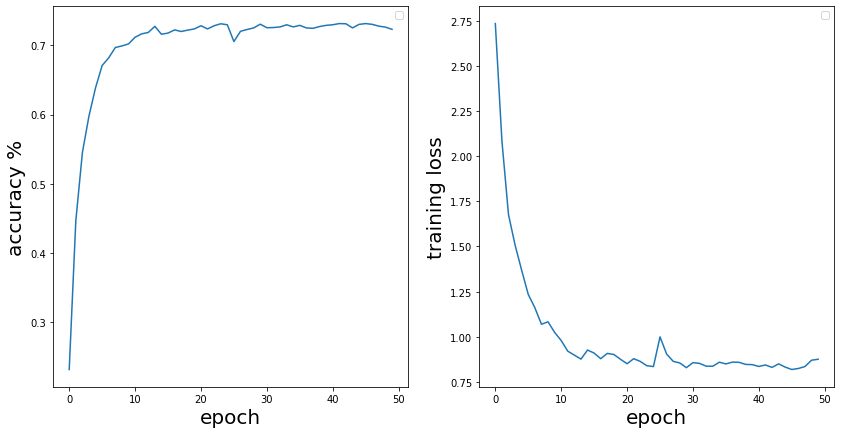

In [113]:
fig, ax = plt.subplots(1,2);
fig.set_size_inches(14,7);

ax[0].plot(classifier_history.history['accuracy'])

ax[0].set_xlabel("epoch", fontsize=20)
ax[0].set_ylabel("accuracy %", fontsize=20)
ax[0].legend()

ax[1].plot(classifier_history.history['loss'])

ax[1].set_xlabel("epoch", fontsize=20)
ax[1].set_ylabel("training loss", fontsize=20)
ax[1].legend()

In [114]:
Y_pred = classifier_model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

matrix = confusion_matrix(y_test, y_pred, normalize='true', labels=[0,1,2,3,4,5,6])

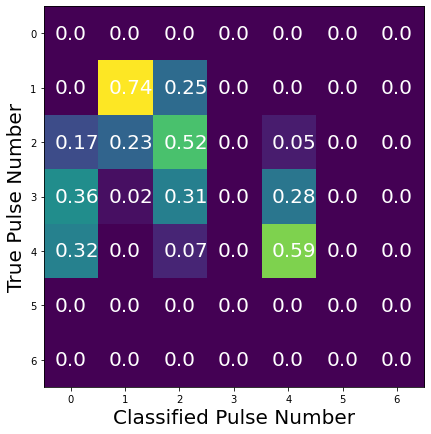

In [115]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

labels = ['0', '1', '2', '3', '4', '5', '6']

grid = np.array(matrix)
im = ax.imshow(grid)

for k in range (0, len(grid)):
        for l in range (0, len(grid[0])):
            ax.text(l-0.3, k+0.1, str(grid[k][l])[:4], size=20, color='white')
            
ax.set_xticklabels([''] + labels);
ax.set_yticklabels([''] + labels);

ax.set_ylabel('True Pulse Number', fontsize=20);
ax.set_xlabel('Classified Pulse Number', fontsize=20);

#ax.set_title("with autoencoder", fontsize=20)


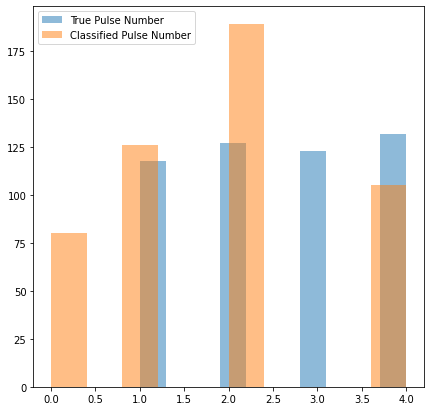

In [97]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

ax.hist(y_test, alpha=0.5, label='True Pulse Number')
ax.hist(y_pred, alpha=0.5, label='Classified Pulse Number')
ax.legend()

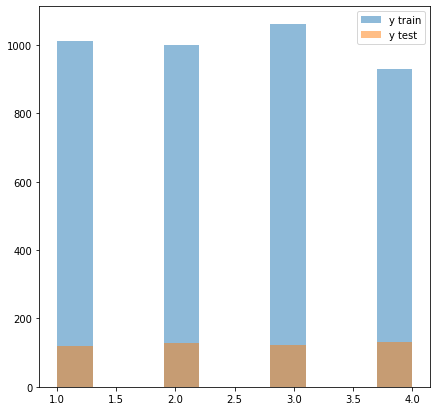

In [98]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

ax.hist(y_train, alpha=0.5, label='y train')
ax.hist(y_test, alpha=0.5, label='y test')
ax.legend()